### Importing Libraries

In [1]:

from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline

import math

from scipy.stats import   ttest_1samp
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

from scipy import stats# this library contains a large number of probability distributions as well as a growing library of statistical functions.
from scipy.stats import norm

### Problem 1

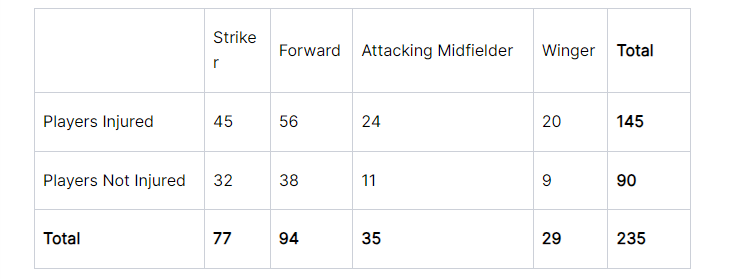

#### 1.1 What is the probability that a randomly chosen player would suffer an injury?

In [2]:
Total_Injured=145
Total_players=235
Prob_injured = round(Total_Injured/Total_players,4)*100
print('Probability of players injured. is %1.1f' % Prob_injured +'%')

Probability of players injured. is 61.7%


#### 1.2 What is the probability that a player is a forward or a winger?

In [3]:
Forward = 94
Winger = 29
Total_players=235
prob_fwd = round(Forward/Total_players,4)*100
print('Probability of player being forward is %1.1f' % prob_fwd +'%')
prob_wng = round(Winger/Total_players,4)*100
print('Probability of player being  winger is %1.1f' % prob_wng +'%')
total = prob_fwd + prob_wng
print('Probability of player being forward or a winger is %1.1f' % total +'%')

Probability of player being forward is 40.0%
Probability of player being  winger is 12.3%
Probability of player being forward or a winger is 52.3%


#### 1.3 What is the probability that a randomly chosen player plays in a striker position and has a foot injury?

In [4]:
injured_striker = 45
Total_players=235
prob_strk_inj = round(injured_striker/Total_players,4)*100
print('Probability of striker players injured. is %1.1f' % prob_strk_inj +'%')

Probability of striker players injured. is 19.1%


#### 1.4 What is the probability that a randomly chosen injured player is a striker?

In [5]:

injured_player = 145
injured_striker = 45
prob_strk_inj = round(injured_striker/injured_player,4)*100
print('Probability of striker players injured. is %1.1f' % prob_strk_inj +'%')

Probability of striker players injured. is 31.0%


### Problem 2


#### The breaking strength of gunny bags used for packaging cement is normally distributed with a mean of 5 kg per sq. centimeter and a standard deviation of 1.5 kg per sq. centimeter. The quality team of the cement company wants to know the following about the packaging material to better understand wastage or pilferage within the supply chain

### Let's write the null and alternate hypotheses

Let $\mu$ be the mean breaking strength of gunny bags .

The manager will test the null hypothesis

>$H_0: \mu = 5$

against the alternate hypothesis

> $H_a: \mu > 5$

### Are the assumptions of Z-test satisfied?

*   Samples are drawn from a normal distribution - Since the sample size is 45(which is > 30), Central Limit Theorem states that the distribution of sample means will be normal. If the sample size was less than 30, we would have been able to apply z test on if we knew that the population distribution was normal.  
*   Observations are from a simple random sample - we are informed that the manager collected a simple random sample
*   Standard deviation is known - Yes


Voila! We can use Z-test for this problem.

#### 2.1 What proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm?



In [6]:
# set the values of population mean and population standard deviation to 5 and 1.5 respectively
mu, sigma = 5, 1.5

# set the value sample mean to 3.17
x_bar = 3.17

# calculate the test statistic
test_stat = (x_bar - mu) / (sigma/np.sqrt(45))
test_stat


-8.18400879764923

In [7]:
# calculate the probability using the cdf() function
p_value= 1- norm.cdf(test_stat)

In [8]:
# p_value < 0.05 => alternative hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
print (" p-value:  %.4f" %p_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 



Level of significance: 0.05
 p-value:  1.0000
We have no evidence to reject the null hypothesis since p value > Level of significance


### Insight

As the p-value ~0.000 is less than level of significance, we can  reject the null hypothesis. Thus, we have statistical evidence to say that the strength of gunny bags is less than 3.17 days.

#### Rejection Region Approach

For this approach, we need to follow the below steps.


1.   We choose a value of level of significance ($\alpha$).

     ($\alpha$ is the probability of rejecting the null hypothesis if it is true.)

2.   Then, we find the rejection region in the graph.

3.   We reject the null hypothesis if the test statistic falls in the rejection region. Else, we don't reject the null hypothesis.

In the given example, the Z test statistic follows a standard normal distribution as shown in the above plot. The Z values lying in the right end of the distribution gives strong evidence against the null hypothesis. To find the rejection region, we will find the value of Z (called critical value) that gives an area of $\alpha$ to the right end.

The critical value separates the region where we will reject the null hypothesis from the region where we won't reject the null hypothesis. See the below plot.

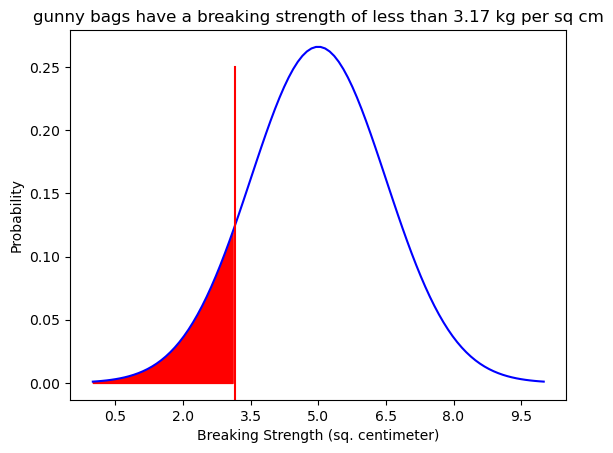

In [9]:
m=5
sd=1.5
x=np.linspace(0,10,100)
plt.xticks(np.arange(-1,12,1.5))
plt.plot(x,stats.norm(m,sd).pdf(x),'b')
px=np.arange(0,3.17,0.1)
plt.fill_between(px,stats.norm(m,sd).pdf(px),color='r')
plt.axvline(3.16,ymax=0.9,linestyle='-',color='r')
plt.xlabel('Breaking Strength (sq. centimeter)') 
plt.ylabel('Probability') 
plt.title('gunny bags have a breaking strength of less than 3.17 kg per sq cm')
plt.show()

In [10]:
stats.norm.cdf(3.17,loc=5,scale=1.5)

0.11123243744783456

### Insight

The proportion of the gunny bags have a breaking strength less than 3.17 kg per sq cm is : 0.11123243744783456

#### 2.2 What proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm.?



In [11]:
# set the values of population mean and population standard deviation to 5 and 1.5 respectively
mu, sigma = 5, 1.5

# set the value sample mean to 3.6
x_bar = 3.6

# calculate the test statistic
test_stat = (x_bar - mu) / (sigma/np.sqrt(45))
test_stat


-6.260990336999411

#### Rejection Region Approach

For this approach, we need to follow the below steps.


1.   We choose a value of level of significance ($\alpha$).

     ($\alpha$ is the probability of rejecting the null hypothesis if it is true.)

2.   Then, we find the rejection region in the graph.

3.   We reject the null hypothesis if the test statistic falls in the rejection region. Else, we don't reject the null hypothesis.

In the given example, the Z test statistic follows a standard normal distribution as shown in the above plot. The Z values lying in the right end of the distribution gives strong evidence against the null hypothesis. To find the rejection region, we will find the value of Z (called critical value) that gives an area of $\alpha$ to the right end.

The critical value separates the region where we will reject the null hypothesis from the region where we won't reject the null hypothesis. See the below plot.

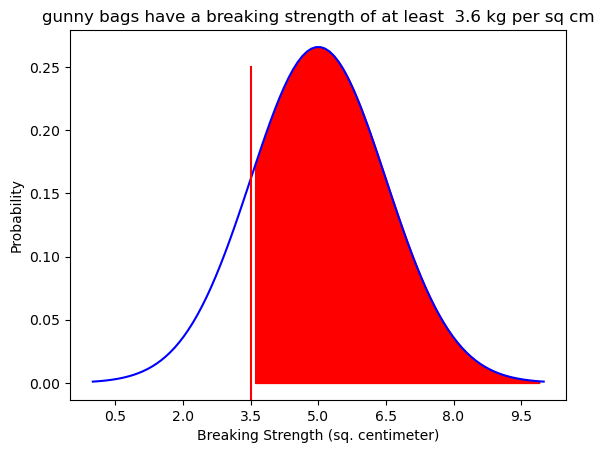

In [12]:
m=5
sd=1.5
x=np.linspace(0,10,100)
plt.xticks(np.arange(-1,12,1.5))
plt.plot(x,stats.norm(m,sd).pdf(x),'b')
px=np.arange(3.6,10,0.1)
plt.fill_between(px,stats.norm(m,sd).pdf(px),color='r')
plt.axvline(3.5,ymax=0.9,linestyle='-',color='r')
plt.xlabel('Breaking Strength (sq. centimeter)') 
plt.ylabel('Probability') 
plt.title('gunny bags have a breaking strength of at least  3.6 kg per sq cm')

plt.show()

In [13]:
1-stats.norm.cdf(3.6,loc=5,scale=1.5)

0.8246760551477705

### Insight
The proportion of the gunny bags have a breaking strength at least 3.6 kg per sq cm is: 0.8246760551477705

#### 2.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?



#### Rejection Region Approach

For this approach, we need to follow the below steps.


1.   We choose a value of level of significance ($\alpha$).

     ($\alpha$ is the probability of rejecting the null hypothesis if it is true.)

2.   Then, we find the rejection region in the graph.

3.   We reject the null hypothesis if the test statistic falls in the rejection region. Else, we don't reject the null hypothesis.

In the given example, the Z test statistic follows a standard normal distribution as shown in the above plot. The Z values lying in the right end of the distribution gives strong evidence against the null hypothesis. To find the rejection region, we will find the value of Z (called critical value) that gives an area of $\alpha$ to the right end.

The critical value separates the region where we will reject the null hypothesis from the region where we won't reject the null hypothesis. See the below plot.

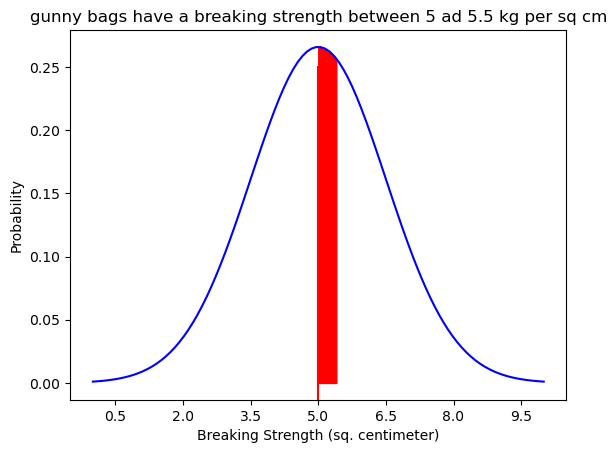

In [14]:
m=5
sd=1.5
x=np.linspace(0,10,100)
plt.xticks(np.arange(-1,12,1.5))
plt.plot(x,stats.norm(m,sd).pdf(x),'b')
px=np.arange(5,5.5,0.1)
plt.fill_between(px,stats.norm(m,sd).pdf(px),color='r')
plt.axvline(5,ymax=0.9,linestyle='-',color='r')
plt.xlabel('Breaking Strength (sq. centimeter)') 
plt.ylabel('Probability') 
plt.title('gunny bags have a breaking strength between 5 ad 5.5 kg per sq cm')

plt.show()

In [15]:
stats.norm.cdf(5.5,loc=5,scale=1.5) - stats.norm.cdf(5,loc=5,scale=1.5)

0.13055865981823633

### Insight
The proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm is 0.13055865981823633

#### 2.4 What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.?

#### Rejection Region Approach

For this approach, we need to follow the below steps.


1.   We choose a value of level of significance ($\alpha$).

     ($\alpha$ is the probability of rejecting the null hypothesis if it is true.)

2.   Then, we find the rejection region in the graph.

3.   We reject the null hypothesis if the test statistic falls in the rejection region. Else, we don't reject the null hypothesis.

In the given example, the Z test statistic follows a standard normal distribution as shown in the above plot. The Z values lying in the right end of the distribution gives strong evidence against the null hypothesis. To find the rejection region, we will find the value of Z (called critical value) that gives an area of $\alpha$ to the right end.

The critical value separates the region where we will reject the null hypothesis from the region where we won't reject the null hypothesis. See the below plot.

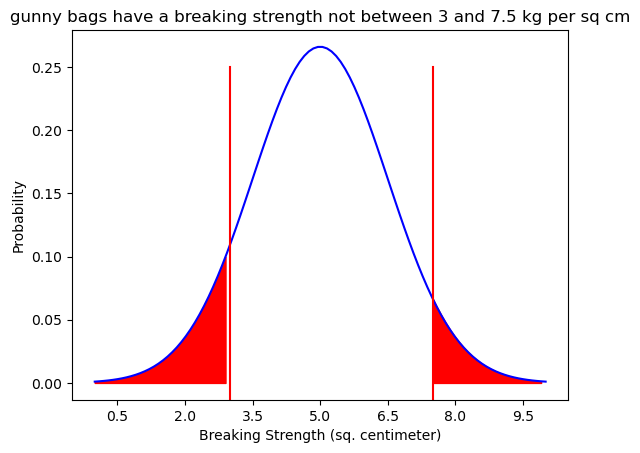

In [16]:
m=5
sd=1.5
x=np.linspace(0,10,100)
plt.xticks(np.arange(-1,12,1.5))
plt.plot(x,stats.norm(m,sd).pdf(x),'b')
px=np.arange(0,3,0.1)
plt.fill_between(px,stats.norm(m,sd).pdf(px),color='r')
plt.axvline(3,ymax=0.9,linestyle='-',color='r')
px=np.arange(7.5,10,0.1)
plt.fill_between(px,stats.norm(m,sd).pdf(px),color='r')
plt.axvline(7.5,ymax=0.9,linestyle='-',color='r')
plt.xlabel('Breaking Strength (sq. centimeter)') 
plt.ylabel('Probability') 
plt.title('gunny bags have a breaking strength not between 3 and 7.5 kg per sq cm')

plt.show()

In [17]:
1-(stats.norm.cdf(7.5,loc=5,scale=1.5) - stats.norm.cdf(3,loc=5,scale=1.5))

0.13900157199868257

### Insight
The proportion of the gunny bags have a breaking strength not between 3 and 7.5 kg per sq cm is 0.13900157199868257

### Problem 3


#### Zingaro stone printing is a company that specializes in printing images or patterns on polished or unpolished stones. However, for the optimum level of printing of the image, the stone surface has to have a Brinell's hardness index of at least 150. Recently, Zingaro has received a batch of polished and unpolished stones from its clients. Use the data provided to answer the following (assuming a 5% significance level);

In [18]:
zingaro_df=pd.read_csv('Zingaro_Company.csv')
zingaro_df.head()

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


In [19]:
zingaro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unpolished            75 non-null     float64
 1   Treated and Polished  75 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


In [20]:
zingaro_df.describe()

,Unpolished,Treated and Polished
count,75.000000,75.000000
mean,134.110527,147.788117
std,33.041804,15.587355
min,48.406838,107.524167
25%,115.329753,138.268300
50%,135.597121,145.721322
75%,158.215098,157.373318
max,200.161313,192.272856


#### 3.1 Zingaro has reason to believe that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?



#####  Step 1: Define null and alternative hypotheses


In testing the hardness index of stones.

Null hypothesis states that hardness index,  $\mu$ is not less than 150.
Alternative hypothesis states that the mean hardness index,  $\mu$ is unequal to 150.
* $H_0$: $\mu_{Unpolished}$ $\geq$  150
* $H_A$: $\mu_{Unpolished}$ <  150

Here mu_{Unpolished} denotes hardness index of unpolished stones 

##### Step 2: Decide the significance level


Here we select α= 0.05.

In [21]:
print("The sample size for this problem is",len(zingaro_df))

The sample size for this problem is 75


### Step 3: Identify the test statistic

We do not know the population standard deviation and n = 30. So we use the t distribution and the $t_{STAT}$ test statistic.

### Step 4: Calculate the p - value and test statistic

**scipy.stats.ttest_1samp calculates the t test for the mean of one sample given the sample observations and  the expected value in the null hypothesis. This function returns t statistic and the two-tailed p value.**

In [22]:
t_statistic, p_value = ttest_1samp(zingaro_df['Unpolished '], 150)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: -4.164629601426757 p value: 8.342573994839304e-05 


### Step 5:Decide to reject or accept null hypothesis

In [23]:
# p_value < 0.05 => alternative hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value=", p_value)

Level of significance: 0.05
We have evidence to reject the null hypothesis since p value < Level of significance
Our one-sample t-test p-value= 8.342573994839304e-05


#### Insight
###### Zingaro is right to consider Unpolished stones are not right for printing.

#### 3.2 Is the mean hardness of the polished and unpolished stones the same?

#####  Step 1: Define null and alternative hypotheses


In testing the hardness index of stones.

Null hypothesis states that hardness index,  $\mu$ is not less than 150.
Alternative hypothesis states that the mean hardness index,  $\mu$ is unequal to 150.
* $H_0$: $\mu_{Unpolished}$ = $\mu_{Polished}$ 
* $H_A$: $\mu_{Unpolished}$$\neq$  $\mu_{Polished}$ 

Here mu_{Unpolished} denotes hardness index of unpolished stones and mu_{Polished} denotes hardness index of polished stones.

##### Step 2: Decide the significance level


Here we select α= 0.05.

In [24]:
print("The sample size for this problem is",len(zingaro_df))

The sample size for this problem is 75


### Step 3: Identify the test statistic

* We have two samples and we do not know the population standard deviation.
* Sample sizes for both samples are  same.
* The sample is not a large sample, n < 30. So you use the t distribution and the $t_{STAT}$ test statistic for two sample unpaired test.

### Step 4: Calculate the p - value and test statistic

** We use the scipy.stats.ttest_ind to calculate the t-test for the means of TWO INDEPENDENT samples of scores given the two sample observations. This function returns t statistic and two-tailed p value.**

** This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances.**

For this exercise, we are going to first assume that the variance is equal and then compute the necessary statistical values.

In [25]:
t_statistic, p_value  = stats.ttest_ind(zingaro_df['Unpolished '],zingaro_df['Treated and Polished'], equal_var=False)
print('tstat  %1.3f' % t_statistic)    
print("p-value for two-tail:", p_value)

tstat  -3.242
p-value for two-tail: 0.001588379295584306


### Step 5:  Decide to reject or accept null hypothesis

In [26]:
# p_value < 0.05 => alternative hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value=", p_value)

Level of significance: 0.05
We have evidence to reject the null hypothesis since p value < Level of significance
Our one-sample t-test p-value= 0.001588379295584306


#### Insight
##### As per the T-Test, We found the P value  it is less than Level of Significance. Hence, We can reject Null Hypothesis. And conclude that Mean Hardness of “Unpolished Stones” and “Polished Stones” are not same

### Problem 4


#### Dental implant data: The hardness of metal implants in dental cavities depends on multiple factors, such as the method of implant, the temperature at which the metal is treated, the alloy used as well as the dentists who may favor one method above another and may work better in his/her favorite method. The response is the variable of interest.

In [27]:
dental_df= pd.read_excel('Dental+Hardness+data.xlsx')
dental_df.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792


In [28]:
dental_df.describe()

,Dentist,Method,Alloy,Temp,Response
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,3.000000,2.000000,1.500000,1600.000000,741.777778
std,1.422136,0.821071,0.502801,82.107083,145.767845
min,1.000000,1.000000,1.000000,1500.000000,289.000000
25%,2.000000,1.000000,1.000000,1500.000000,698.000000
50%,3.000000,2.000000,1.500000,1600.000000,767.000000
75%,4.000000,3.000000,2.000000,1700.000000,824.000000
max,5.000000,3.000000,2.000000,1700.000000,1115.000000


In [29]:
dental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Dentist   90 non-null     int64
 1   Method    90 non-null     int64
 2   Alloy     90 non-null     int64
 3   Temp      90 non-null     int64
 4   Response  90 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


In [30]:
dental_df.Alloy = pd.Categorical(dental_df.Alloy)

In [31]:
dental_df.Alloy.value_counts

<bound method IndexOpsMixin.value_counts of 0     1
1     1
2     1
3     2
4     2
     ..
85    1
86    1
87    2
88    2
89    2
Name: Alloy, Length: 90, dtype: category
Categories (2, int64): [1, 2]>

In [32]:
alloy1_df = dental_df[dental_df['Alloy']==1]
alloy2_df = dental_df[dental_df['Alloy']==2]

#### 4.1 How does the hardness of implants vary depending on dentists?

In [33]:
dental_df.Dentist = pd.Categorical(dental_df.Dentist)

In [34]:
dental_df.Dentist.value_counts

<bound method IndexOpsMixin.value_counts of 0     1
1     1
2     1
3     1
4     1
     ..
85    5
86    5
87    5
88    5
89    5
Name: Dentist, Length: 90, dtype: category
Categories (5, int64): [1, 2, 3, 4, 5]>

### Let's write the null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3,\mu_4,\mu_5$ be the means of Hardness of Implants for Dentists 1,2,3,4,5 respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3 = \mu_4 =\mu_5$

against the alternative hypothesis

>$H_a: $ At least one Hardness of Implants level is different from the rest.


Dentist
1    783.055556
2    786.666667
3    748.611111
4    713.666667
5    676.888889
Name: Response, dtype: float64


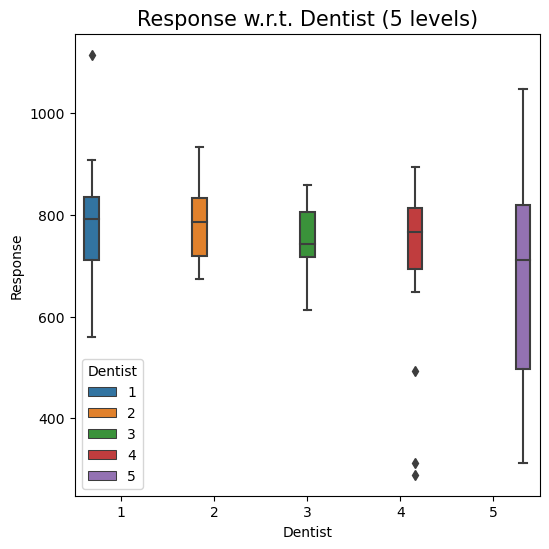

In [35]:
# mean of hardness of Implants at different types of the Dentist factor
print(dental_df.groupby("Dentist")["Response"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "Dentist", y = 'Response' , data = dental_df, hue = 'Dentist')
a.set_title("Response w.r.t. Dentist (5 levels)", fontsize=15)
plt.show()

Now, the normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Dentist follows a normal distribution 

against the alternative hypothesis

>$H_a:$ Dentist does not follow a normal distribution

In [36]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(dental_df.Dentist) 
print('The p-value is', p_value)

The p-value is 1.1794428473876906e-06


In [37]:
# p_value < 0.05 => alternative hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
print (" p-value=", p_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 



Level of significance: 0.05
 p-value= 1.1794428473876906e-06
We have evidence to reject the null hypothesis since p value < Level of significance


Since p-value of the test is small, we reject the null hypothesis that the Dentist follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

The [`levene()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) function of Scipy will be used to compute the test statistic and p-value.

In [38]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene(dental_df['Response'][dental_df['Dentist']==1], 
                                   dental_df['Response'][dental_df['Dentist']==2],
                            dental_df['Response'][dental_df['Dentist']==3],
                           dental_df['Response'][dental_df['Dentist']==4],
                           dental_df['Response'][dental_df['Dentist']==5],)
# find the p-value
print('The p-value is', p_value)

The p-value is 0.007858817382355401


In [39]:
# p_value < 0.05 => alternative hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
print (" p-value=", p_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 



Level of significance: 0.05
 p-value= 0.007858817382355401
We have evidence to reject the null hypothesis since p value < Level of significance


### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - No, the normality assumption can not be verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - No, the homogeneity of variance assumption can not be verified using the Levene's test.



Since the p-value is small, we reject the null hypothesis of homogeneity of variances.

### Let's find the p-value

The [`f_oneway()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) function of Scipy will be used to compute the test statistic and p-value.

In [40]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(dental_df.loc[dental_df['Dentist']==1,"Response"],
                            dental_df.loc[dental_df['Dentist']==2,"Response"],
                             dental_df.loc[dental_df['Dentist']==3,"Response"],
                             dental_df.loc[dental_df['Dentist']==4,"Response"],
                             dental_df.loc[dental_df['Dentist']==5,"Response"])
print('The p-value is ' + str(p_value))

The p-value is 0.11206595023098852


In [41]:
# p_value < 0.05 => alternative hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
print (" p-value=", p_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 



Level of significance: 0.05
 p-value= 0.11206595023098852
We have no evidence to reject the null hypothesis since p value > Level of significance


### Insight
As the p-value is much less than the significance level, we fail to reject the null hypothesis. Hence, we have have enough statistical significance to conclude that  all Dentist have same response at 5% significance level.



In [42]:
formula = 'Response ~   C(Dentist) '
model = ols(formula, alloy1_df).fit()
aov_table = anova_lm(model)
print(aov_table)

              df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  106683.688889  26670.922222  1.977112  0.116567
Residual    40.0  539593.555556  13489.838889       NaN       NaN


In [43]:
formula = 'Response ~   C(Dentist) '
model = ols(formula, alloy2_df).fit()
aov_table = anova_lm(model)
print(aov_table)

              df        sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  5.679791e+04  14199.477778  0.524835  0.718031
Residual    40.0  1.082205e+06  27055.122222       NaN       NaN


In [44]:
formula = 'Response ~   C(Dentist) '
model = ols(formula, dental_df).fit()
aov_table = anova_lm(model)
print(aov_table)

              df        sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  1.577946e+05  39448.638889  1.934537  0.112066
Residual    85.0  1.733301e+06  20391.776471       NaN       NaN


#### 4.2 How does the hardness of implants vary depending on methods?

In [45]:
dental_df.Method = pd.Categorical(dental_df.Method)

In [46]:
dental_df.Method.value_counts

<bound method IndexOpsMixin.value_counts of 0     1
1     1
2     1
3     1
4     1
     ..
85    3
86    3
87    3
88    3
89    3
Name: Method, Length: 90, dtype: category
Categories (3, int64): [1, 2, 3]>

### Let's write the null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of Hardness of Implants for Methods 1,2,3 respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3 $

against the alternative hypothesis

>$H_a: $ At least one Hardness of Implants level is different from the rest.


Method
1    793.900000
2    804.333333
3    627.100000
Name: Response, dtype: float64


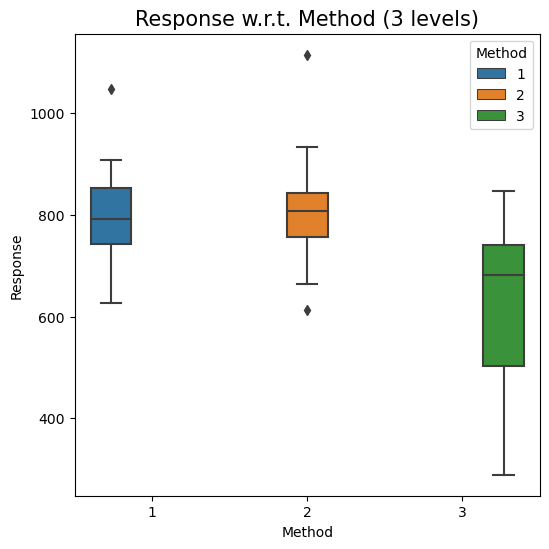

In [47]:
# mean of hardness of Implants at different levels of the Method factor
print(dental_df.groupby("Method")["Response"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "Method", y = 'Response' , data = dental_df, hue = 'Method')
a.set_title("Response w.r.t. Method (3 levels)", fontsize=15)
plt.show()

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Method follows a normal distribution 

against the alternative hypothesis

>$H_a:$ Method does not follow a normal distribution

In [48]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(dental_df.Method) 
print('The p-value is', p_value)

The p-value is 6.475901481728386e-10


In [49]:
# p_value < 0.05 => alternative hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
print (" p-value=", p_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 



Level of significance: 0.05
 p-value= 6.475901481728386e-10
We have evidence to reject the null hypothesis since p value < Level of significance


Since p-value of the test is small, we reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

The [`levene()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) function of Scipy will be used to compute the test statistic and p-value.

In [50]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene(dental_df['Response'][dental_df['Method']==1], 
                                   dental_df['Response'][dental_df['Method']==2],
                            dental_df['Response'][dental_df['Method']==3])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.004138452940152019


In [51]:
# p_value < 0.05 => alternative hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
print (" p-value=", p_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 



Level of significance: 0.05
 p-value= 0.004138452940152019
We have evidence to reject the null hypothesis since p value < Level of significance


Since the p-value is small, we reject the null hypothesis of homogeneity of variances.

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - No, the normality assumption can not be verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - No, the homogeneity of variance assumption can not be verified using the Levene's test.



### Let's find the p-value

The [`f_oneway()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) function of Scipy will be used to compute the test statistic and p-value.

In [52]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(dental_df.loc[dental_df['Method']==1,"Response"],
                            dental_df.loc[dental_df['Method']==2,"Response"],
                             dental_df.loc[dental_df['Method']==3,"Response"])
print('The p-value is ' + str(p_value))

The p-value is 7.683891892977992e-08


In [53]:
# p_value < 0.05 => alternative hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
print (" p-value=", p_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 



Level of significance: 0.05
 p-value= 7.683891892977992e-08
We have evidence to reject the null hypothesis since p value < Level of significance


### Insight
As the p-value is much less than the significance level, we can reject the null hypothesis. Hence, we do have enough statistical significance to conclude that  at least one Method  is different from the rest at 5% significance level.

However, we don't know which mean is different from the rest or whether all pairs of means are different. Multiple comparison tests are used to test the differences between all pairs of means.


### Multiple Comparison test (Tukey HSD)


In order to identify for which method mean hardness of implants is different from other groups, the null hypothesis is

  > $𝐻_0: 𝜇_1=𝜇_2 \text{ and } 𝜇_1=𝜇_3 \text{ and } 𝜇_2=𝜇_3$

against the alternative hypothesis

 > $𝐻_a: 𝜇_1\neq𝜇_2 \text{ or } 𝜇_1\neq𝜇_3 \text{ or } 𝜇_2\neq𝜇_3$

The [`pairwise_tukeyhsd()`](https://www.statsmodels.org/dev/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html) function of Statsmodels will be used to compute the test statistic and p-value.

In [54]:
#import the required function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = dental_df['Response'], groups = dental_df['Method'], alpha = 0.05)
print(m_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     1      2   10.4333 0.9415  -64.7584   85.6251  False
     1      3    -166.8    0.0 -241.9917  -91.6083   True
     2      3 -177.2333    0.0 -252.4251 -102.0416   True
---------------------------------------------------------


### Insight

As the p-values (refer to the p-adj column) for comparing the mean Hardness Implants for the pair 1-3 and 2-3 is less than the significance level, the null hypothesis of equality of all population means can be rejected.

Thus, we can say that the mean Hardness of Implants for Methods 1 and 2 is similar but Hardness of Implants for Method 3 is significantly different from 1 and 2.

In [55]:
formula = 'Response ~ C(Method) '
model = ols(formula, alloy1_df).fit()
aov_table = anova_lm(model)
print(aov_table)

             df         sum_sq       mean_sq         F    PR(>F)
C(Method)   2.0  148472.177778  74236.088889  6.263327  0.004163
Residual   42.0  497805.066667  11852.501587       NaN       NaN


In [56]:
formula = 'Response ~ C(Method) '
model = ols(formula, alloy2_df).fit()
aov_table = anova_lm(model)
print(aov_table)

             df    sum_sq        mean_sq        F    PR(>F)
C(Method)   2.0  499640.4  249820.200000  16.4108  0.000005
Residual   42.0  639362.4   15222.914286      NaN       NaN


In [57]:
formula = 'Response ~ C(Method) '
model = ols(formula, dental_df).fit()
aov_table = anova_lm(model)
print(aov_table)

             df        sum_sq        mean_sq         F        PR(>F)
C(Method)   2.0  5.934275e+05  296713.744444  19.89268  7.683892e-08
Residual   87.0  1.297668e+06   14915.724904       NaN           NaN


#### 4.3 What is the interaction effect between the dentist and method on the hardness of dental implants for each type of alloy?

<Axes: xlabel='Dentist', ylabel='Response'>

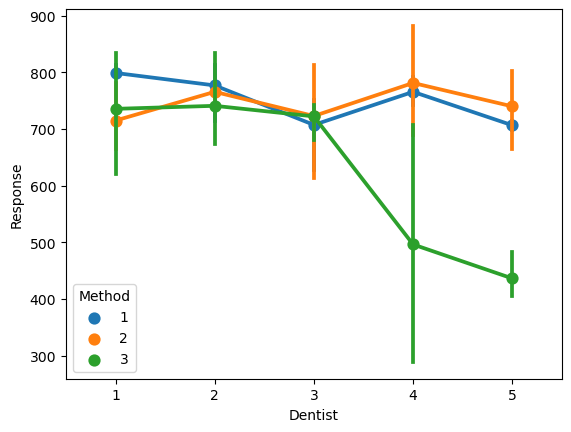

In [58]:
sns.pointplot(x='Dentist', y='Response', data=alloy1_df, hue='Method')

<Axes: xlabel='Dentist', ylabel='Response'>

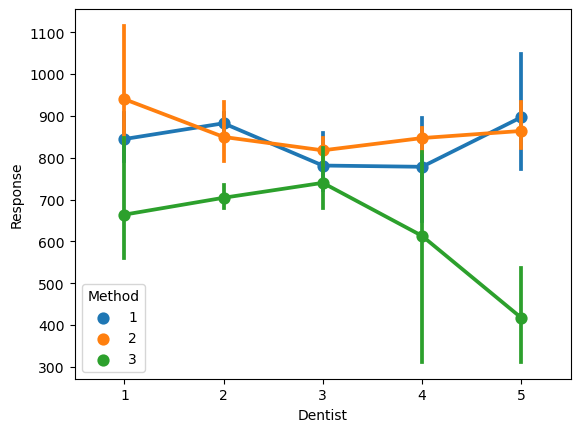

In [59]:
sns.pointplot(x='Dentist', y='Response', data=alloy2_df, hue='Method')

#### 4.4 How does the hardness of implants vary depending on dentists and methods together?

In [60]:
# mean of hardness of Implants at different levels of the Method factor
print(dental_df.groupby(["Dentist","Method"])["Response"].mean())

Dentist  Method
1        1         821.833333
         2         827.500000
         3         699.833333
2        1         829.666667
         2         807.666667
         3         722.666667
3        1         744.333333
         2         770.333333
         3         731.166667
4        1         772.000000
         2         814.166667
         3         554.833333
5        1         801.666667
         2         802.000000
         3         427.000000
Name: Response, dtype: float64


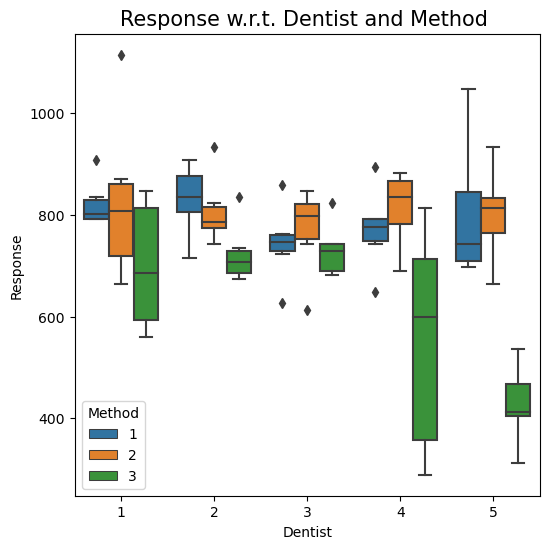

In [61]:



# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "Dentist", y = 'Response' , data = dental_df, hue = 'Method')
a.set_title("Response w.r.t. Dentist and Method ", fontsize=15)
plt.show()

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Hardness of implants follows a normal distribution 

against the alternative hypothesis

>$H_a:$ Hardness of implants does not follow a normal distribution

In [62]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(dental_df.Response) 
print('The p-value is', p_value)

The p-value is 8.080212865024805e-06


In [63]:
# p_value < 0.05 => alternative hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
print (" p-value=", p_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 



Level of significance: 0.05
 p-value= 8.080212865024805e-06
We have evidence to reject the null hypothesis since p value < Level of significance


Since p-value of the test is small, we reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

The [`levene()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) function of Scipy will be used to compute the test statistic and p-value.

In [64]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene(dental_df['Response'][dental_df['Method']==1][dental_df['Dentist']==1], 
                                   dental_df['Response'][dental_df['Method']==2][dental_df['Dentist']==1],
                            dental_df['Response'][dental_df['Method']==3][dental_df['Dentist']==1],
                            dental_df['Response'][dental_df['Method']==1][dental_df['Dentist']==2], 
                                   dental_df['Response'][dental_df['Method']==2][dental_df['Dentist']==2],
                            dental_df['Response'][dental_df['Method']==3][dental_df['Dentist']==2],
                            dental_df['Response'][dental_df['Method']==1][dental_df['Dentist']==3], 
                                   dental_df['Response'][dental_df['Method']==2][dental_df['Dentist']==3],
                            dental_df['Response'][dental_df['Method']==3][dental_df['Dentist']==3],
                            dental_df['Response'][dental_df['Method']==1][dental_df['Dentist']==4], 
                                   dental_df['Response'][dental_df['Method']==2][dental_df['Dentist']==4],
                            dental_df['Response'][dental_df['Method']==3][dental_df['Dentist']==4],
                            dental_df['Response'][dental_df['Method']==1][dental_df['Dentist']==5], 
                                   dental_df['Response'][dental_df['Method']==2][dental_df['Dentist']==5],
                            dental_df['Response'][dental_df['Method']==3][dental_df['Dentist']==5])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.003863706288294136


In [65]:
# p_value < 0.05 => alternative hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
print (" p-value=", p_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 



Level of significance: 0.05
 p-value= 0.003863706288294136
We have evidence to reject the null hypothesis since p value < Level of significance


Since the p-value is small, we reject the null hypothesis of homogeneity of variances.

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - No, the normality assumption can not be verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - No, the homogeneity of variance assumption can not be verified using the Levene's test.



### Let's find the p-value

The [`f_oneway()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) function of Scipy will be used to compute the test statistic and p-value.

In [66]:
dental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Dentist   90 non-null     category
 1   Method    90 non-null     category
 2   Alloy     90 non-null     category
 3   Temp      90 non-null     int64   
 4   Response  90 non-null     int64   
dtypes: category(3), int64(2)
memory usage: 2.3 KB


In [67]:
dental_df['Method'].describe()


count     90
unique     3
top        1
freq      30
Name: Method, dtype: int64

In [68]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test

test_stat, p_value = f_oneway(dental_df.loc[(pd.to_numeric(dental_df['Method']==1) & pd.to_numeric(dental_df['Dentist']==1)),"Response"],
                            dental_df.loc[(pd.to_numeric(dental_df['Method']==2) & pd.to_numeric(dental_df['Dentist']==1)),"Response"],
                             dental_df.loc[(pd.to_numeric(dental_df['Method']==3) & pd.to_numeric(dental_df['Dentist']==1)),"Response"],
                              dental_df.loc[(pd.to_numeric(dental_df['Method']==1) & pd.to_numeric(dental_df['Dentist']==2)),"Response"],
                            dental_df.loc[(pd.to_numeric(dental_df['Method']==2) & pd.to_numeric(dental_df['Dentist']==2)),"Response"],
                             dental_df.loc[(pd.to_numeric(dental_df['Method']==3) & pd.to_numeric(dental_df['Dentist']==2)),"Response"],
                              dental_df.loc[(pd.to_numeric(dental_df['Method']==1) & pd.to_numeric(dental_df['Dentist']==3)),"Response"],
                            dental_df.loc[(pd.to_numeric(dental_df['Method']==2) & pd.to_numeric(dental_df['Dentist']==3)),"Response"],
                             dental_df.loc[(pd.to_numeric(dental_df['Method']==3) & pd.to_numeric(dental_df['Dentist']==3)),"Response"],
                              dental_df.loc[(pd.to_numeric(dental_df['Method']==1) & pd.to_numeric(dental_df['Dentist']==4)),"Response"],
                            dental_df.loc[(pd.to_numeric(dental_df['Method']==2) & pd.to_numeric(dental_df['Dentist']==4)),"Response"],
                             dental_df.loc[(pd.to_numeric(dental_df['Method']==3) & pd.to_numeric(dental_df['Dentist']==4)),"Response"],
                              dental_df.loc[(pd.to_numeric(dental_df['Method']==1) & pd.to_numeric(dental_df['Dentist']==5)),"Response"],
                            dental_df.loc[(pd.to_numeric(dental_df['Method']==2) & pd.to_numeric(dental_df['Dentist']==5)),"Response"],
                             dental_df.loc[(pd.to_numeric(dental_df['Method']==3) & pd.to_numeric(dental_df['Dentist']==5)),"Response"],
                             )
print('The p-value is ' + str(p_value))

The p-value is 1.0319718890274577e-08


In [69]:
# p_value < 0.05 => alternative hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
print (" p-value=", p_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 



Level of significance: 0.05
 p-value= 1.0319718890274577e-08
We have evidence to reject the null hypothesis since p value < Level of significance


### Insight
As the p-value is much less than the significance level, we can reject the null hypothesis. Hence, we do have enough statistical significance to conclude that  at least one Method and Dentist is different from the rest at 5% significance level.

However, we don't know which mean is different from the rest or whether all pairs of means are different. Multiple comparison tests are used to test the differences between all pairs of means.


### Multiple Comparison test (Tukey HSD)


In order to identify for which fuel type mean carbon emission is different from other groups, the null hypothesis is

  > $𝐻_0: 𝜇_1=𝜇_2 \text{ and } 𝜇_1=𝜇_3 \text{ and } 𝜇_2=𝜇_3$

against the alternative hypothesis

 > $𝐻_a: 𝜇_1\neq𝜇_2 \text{ or } 𝜇_1\neq𝜇_3 \text{ or } 𝜇_2\neq𝜇_3$

The [`pairwise_tukeyhsd()`](https://www.statsmodels.org/dev/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html) function of Statsmodels will be used to compute the test statistic and p-value.

In [70]:
#import the required function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = dental_df['Method'], groups = dental_df['Dentist'], alpha = 0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     1      2      0.0   1.0 -0.7806 0.7806  False
     1      3      0.0   1.0 -0.7806 0.7806  False
     1      4      0.0   1.0 -0.7806 0.7806  False
     1      5      0.0   1.0 -0.7806 0.7806  False
     2      3      0.0   1.0 -0.7806 0.7806  False
     2      4      0.0   1.0 -0.7806 0.7806  False
     2      5      0.0   1.0 -0.7806 0.7806  False
     3      4      0.0   1.0 -0.7806 0.7806  False
     3      5      0.0   1.0 -0.7806 0.7806  False
     4      5      0.0   1.0 -0.7806 0.7806  False
--------------------------------------------------


In [71]:

formula = 'Response ~ C(Dentist) + C(Method) + C(Dentist) : C(Method)'
model = ols(formula, alloy1_df).fit()
aov_table = anova_lm(model)
print(aov_table)

                        df         sum_sq       mean_sq          F    PR(>F)
C(Dentist)             4.0  106683.688889  26670.922222   3.899638  0.011484
C(Method)              2.0  148472.177778  74236.088889  10.854287  0.000284
C(Dentist):C(Method)   8.0  185941.377778  23242.672222   3.398383  0.006793
Residual              30.0  205180.000000   6839.333333        NaN       NaN


In [72]:

formula = 'Response ~ C(Dentist) + C(Method) + C(Dentist) : C(Method)'
model = ols(formula, alloy2_df).fit()
aov_table = anova_lm(model)
print(aov_table)

                        df         sum_sq        mean_sq          F    PR(>F)
C(Dentist)             4.0   56797.911111   14199.477778   1.106152  0.371833
C(Method)              2.0  499640.400000  249820.200000  19.461218  0.000004
C(Dentist):C(Method)   8.0  197459.822222   24682.477778   1.922787  0.093234
Residual              30.0  385104.666667   12836.822222        NaN       NaN


In [73]:

formula = 'Response ~ C(Dentist) + C(Method) + C(Dentist) : C(Method)'
model = ols(formula, dental_df).fit()
aov_table = anova_lm(model)
print(aov_table)

                        df         sum_sq        mean_sq          F  \
C(Dentist)             4.0  157794.555556   39448.638889   3.550086   
C(Method)              2.0  593427.488889  296713.744444  26.702047   
C(Dentist):C(Method)   8.0  306471.844444   38308.980556   3.447526   
Residual              75.0  833401.666667   11112.022222        NaN   

                            PR(>F)  
C(Dentist)            1.045384e-02  
C(Method)             1.750208e-09  
C(Dentist):C(Method)  1.969515e-03  
Residual                       NaN  


## ***** THE END  *****